# **Этап 1. Подготовка данных:**

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od


od.download('https://www.kaggle.com/datasets/saramah/diabets-data-set')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mgk717
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/saramah/diabets-data-set


100%|██████████| 8.91k/8.91k [00:00<00:00, 7.57MB/s]

In [3]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error


f = ('/content/diabets-data-set/diabetes.csv')
data = pd.read_csv(f)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Удаление строк с любыми пропущенными значениями
clean_data = data.dropna()
clean_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# Выведем информацию о данных до и после очистки
print("Размер исходных данных:", data.shape)
print("Размер данных после удаления строк с пропусками:", clean_data.shape)

Размер исходных данных: (768, 9)
Размер данных после удаления строк с пропусками: (768, 9)


In [6]:
# воспользуемся функциями isnull() и sum()
clean_data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
# импортируем необходимый класс из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler

# создадим объект этого класса
scaler = StandardScaler()

# приведем данные к единому масштабу
scaled_data = scaler.fit_transform(clean_data)

In [8]:
# преобразуем scaled_data обратно в датафрейм
df_scaled = pd.DataFrame(scaled_data, columns=['Pregnancies', 'Glucose', 'BloodPressure',
                                               'SkinThickness', 'Insulin', 'BMI',
                                               'DiabetesPedigreeFunction', 'Age', 'Outcome'])

# посмотрим на результат (только два первых значения)
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


# **Этап 2. Реализация моделей:**

In [9]:
X = clean_data.iloc[:,:-1].values
Y = clean_data.iloc[:,-1:].values

In [17]:
# импортируем необходимый модуль
from sklearn.model_selection import train_test_split

# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости результата
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [19]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression

# создадим объект этого класса и запишем его в переменную model
model1 = LogisticRegression()

# обучим нашу модель
model1.fit(X_train, y_train)

# выполним предсказание класса на тестовой выборке
y_pred1 = model1.predict(X_test)
y_pred1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [20]:
# Импортируйте необходимые модули
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model2 = KNeighborsClassifier()
# обучим нашу модель
model2.fit(X_train, y_train)

# выполним предсказание класса на тестовой выборке
y_pred2 = model2.predict(X_test)

print("Точность тестирования:", accuracy_score(y_test, y_pred2) * 100, '%')

Точность тестирования: 68.83116883116884 %


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import recall_score


model3 = SVC(probability=True)  # Включаем вероятность для ROC
# обучим нашу модель
model3.fit(X_train, y_train)

# выполним предсказание класса на тестовой выборке
y_pred3 = model3.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
params= {
    'C': [0.01, 0.1, 1, 10]
}

gs1 = GridSearchCV(estimator=model1, param_grid=params, cv=5)
# теперь сопоставьте набор данных с объектом GridSearchCV.
gs1 = gs1.fit(X_train, y_train)
# Вывод лучших параметров и тестовой точности
best_params1 = gs1.best_params_
accuracy1 = gs1.best_score_
print("Лучшие параметры:", best_params1)
print("Тестовая точность:", accuracy1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Лучшие параметры: {'C': 0.01}
Тестовая точность: 0.778331602630668


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [33]:
params= {
    'n_neighbors': [3, 5, 7, 9]
}

gs2 = GridSearchCV(estimator=model2, param_grid=params, cv=5)
# теперь сопоставьте набор данных с объектом GridSearchCV.
gs2 = gs2.fit(X_train, y_train)
# Вывод лучших параметров и тестовой точности
best_params2 = gs2.best_params_
accuracy2 = gs2.best_score_
print("Лучшие параметры:", best_params2)
print("Тестовая точность:", accuracy2)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Лучшие параметры: {'n_neighbors': 9}
Тестовая точность: 0.7298892350294219


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [36]:
params= {
    'C': [0.01, 0.1, 1, 10]
}

gs3 = GridSearchCV(estimator=model1, param_grid=params, cv=10)
# теперь сопоставьте набор данных с объектом GridSearchCV.
gs3 = gs3.fit(X_train, y_train)
# Вывод лучших параметров и тестовой точности
best_params3 = gs3.best_params_
accuracy3 = gs3.best_score_
print("Лучшие параметры:", best_params3)
print("Тестовая точность:", accuracy3)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Лучшие параметры: {'C': 0.1}
Тестовая точность: 0.7764849755415792


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

# **Этап 3. Оценка качества моделей:**

In [41]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix
# Предсказание
y_pred1 = model1.predict(X_test)
# передадим ей тестовые и прогнозные значения
# поменяем порядок так, чтобы злокачественные опухоли были положительным классом
model_matrix = confusion_matrix(y_test, y_pred1, labels = [1, 0])

# добавим подписи к столбцам и строкам через параметры columns и index
# столбец - это прогноз, строка - фактическое значение
# 0 - добр. образование, 1 - злок. образование (только в рамках матрицы ошибок!)
# для удобства создадим датафрейм
model_matrix_df = pd.DataFrame(model_matrix, columns = ['Прогноз добр.', 'Прогноз злок.'], index = ['Факт добр.', 'Факт злок.'])
model_matrix_df

,Прогноз добр.,Прогноз злок.
Факт добр.,50,30
Факт злок.,30,121


In [44]:
from sklearn.metrics import accuracy_score, f1_score
# Оценка метрик
accuracy = accuracy_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1, average='weighted')
print("Accuracy:", accuracy)
print("F1:", f1)

Accuracy: 0.7402597402597403
F1: 0.7402597402597403


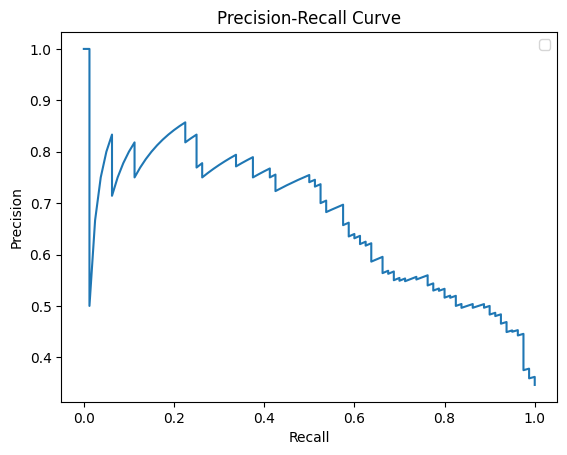

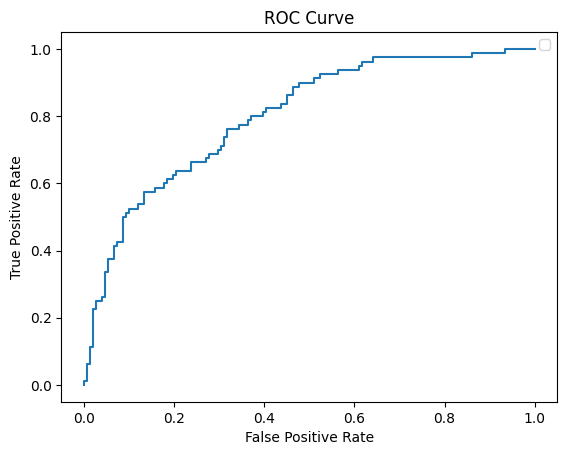

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

y_scores1 = model1.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores1)
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_scores1)
plt.plot(fpr, tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

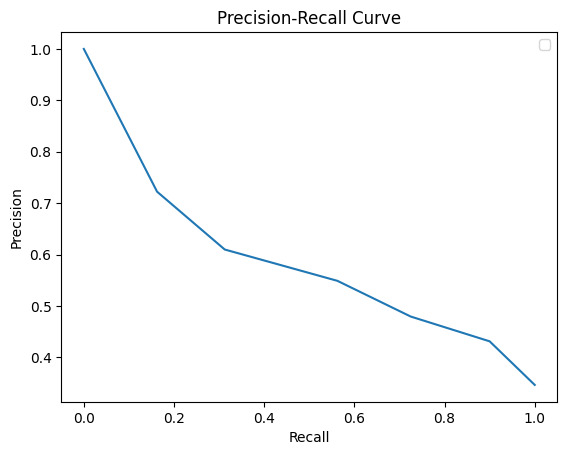

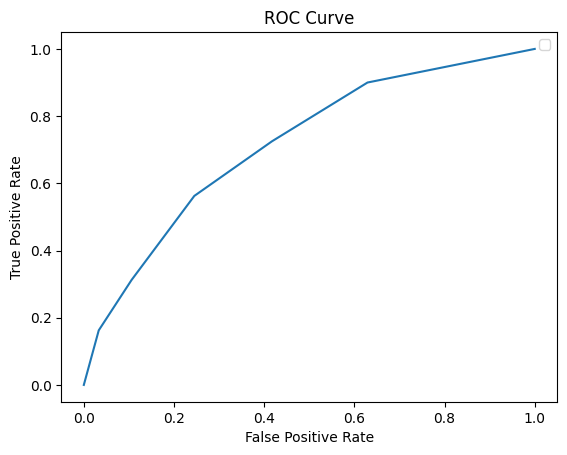

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

y_scores2 = model2.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores2)
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_scores2)
plt.plot(fpr, tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

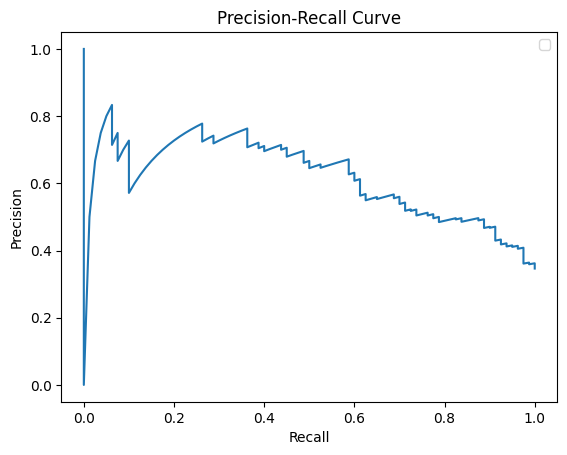

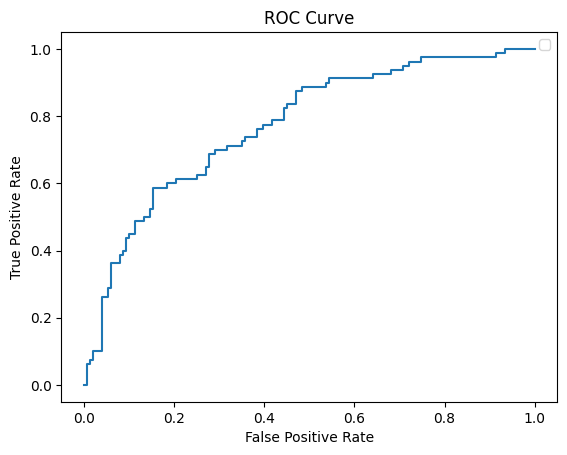

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

y_scores3 = model3.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores3)
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_scores3)
plt.plot(fpr, tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_scores1 = model1.predict_proba(X_test)[:, 1]
pr_auc1 = average_precision_score(y_test, y_scores1)
roc_auc1 = roc_auc_score(y_test, y_scores1)
print("PR AUC:", pr_auc1)
print("ROC AUC:", roc_auc1)

PR AUC: 0.6726266146079649
ROC AUC: 0.8002483443708608


In [66]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_scores2 = model2.predict_proba(X_test)[:, 1]
pr_auc2 = average_precision_score(y_test, y_scores2)
roc_auc2 = roc_auc_score(y_test, y_scores2)
print("PR AUC:", pr_auc2)
print("ROC AUC:", roc_auc2)

PR AUC: 0.5339933461083899
ROC AUC: 0.7161837748344371


In [67]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_scores3 = model3.predict_proba(X_test)[:, 1]
pr_auc3 = average_precision_score(y_test, y_scores3)
roc_auc3 = roc_auc_score(y_test, y_scores3)
print("PR AUC:", pr_auc3)
print("ROC AUC:", roc_auc3)

PR AUC: 0.6208021102046213
ROC AUC: 0.7720198675496689


# **Этап 4. Оптимизация порога (для бинарной классификации):**

In [75]:
from numpy import argmax
import numpy as np
# Вычисление F1-метрики для каждого порога
precision, recall, thresholds = precision_recall_curve(y_test, y_scores1)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold_pr = thresholds[argmax(f1_scores)]
# Вычисление G_mean для каждого порога на основе ROC-кривой
gmean = np.sqrt(tpr * (1 - fpr))
optimal_threshold_roc = thresholds[argmax(gmean)]
print(optimal_threshold_pr)
print(gmean)

0.31343407587018934
[0.         0.1118034  0.11143257 0.24917081 0.24833885 0.33318153
 0.33206159 0.46960601 0.46801681 0.49333304 0.48996553 0.50206527
 0.50033102 0.56732205 0.56534875 0.5959299  0.59174789 0.62063042
 0.61842569 0.62772584 0.62322596 0.67598346 0.67352979 0.68189695
 0.67940371 0.68763921 0.68001266 0.68806043 0.68286744 0.70628681
 0.69542021 0.70293849 0.69458645 0.70193677 0.69910065 0.70634541
 0.70057923 0.70769189 0.70476148 0.7117742  0.6967878  0.71031893
 0.69470562 0.70122882 0.69803414 0.70446777 0.69470562 0.70099267
 0.69767827 0.70387998 0.70052015 0.71270402 0.70926928 0.72119061
 0.70704824 0.71282016 0.70193677 0.70757491 0.70387998 0.70944433
 0.69434804 0.69975161 0.6958962  0.70122882 0.68147192 0.68661517
 0.67848926 0.6885415  0.68019524 0.68998272 0.68141118 0.68619307
 0.66412318 0.66871925 0.6596206  0.66412318 0.63584954 0.6401314
 0.6052338  0.60925533 0.60407008 0.60803124 0.58669012 0.59048751
 0.36823366 0.37058661 0.25572906 0.2573425

In [77]:
from numpy import argmax
import numpy as np
# Вычисление F1-метрики для каждого порога
precision, recall, thresholds = precision_recall_curve(y_test, y_scores2)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold_pr = thresholds[argmax(f1_scores)]
# Вычисление G_mean для каждого порога на основе ROC-кривой
gmean = np.sqrt(tpr * (1 - fpr))
print(optimal_threshold_pr)
print(gmean)

0.2
[0.         0.1118034  0.11143257 0.24917081 0.24833885 0.33318153
 0.33206159 0.46960601 0.46801681 0.49333304 0.48996553 0.50206527
 0.50033102 0.56732205 0.56534875 0.5959299  0.59174789 0.62063042
 0.61842569 0.62772584 0.62322596 0.67598346 0.67352979 0.68189695
 0.67940371 0.68763921 0.68001266 0.68806043 0.68286744 0.70628681
 0.69542021 0.70293849 0.69458645 0.70193677 0.69910065 0.70634541
 0.70057923 0.70769189 0.70476148 0.7117742  0.6967878  0.71031893
 0.69470562 0.70122882 0.69803414 0.70446777 0.69470562 0.70099267
 0.69767827 0.70387998 0.70052015 0.71270402 0.70926928 0.72119061
 0.70704824 0.71282016 0.70193677 0.70757491 0.70387998 0.70944433
 0.69434804 0.69975161 0.6958962  0.70122882 0.68147192 0.68661517
 0.67848926 0.6885415  0.68019524 0.68998272 0.68141118 0.68619307
 0.66412318 0.66871925 0.6596206  0.66412318 0.63584954 0.6401314
 0.6052338  0.60925533 0.60407008 0.60803124 0.58669012 0.59048751
 0.36823366 0.37058661 0.25572906 0.25734251 0.        ]


In [70]:
from numpy import argmax
import numpy as np
# Вычисление F1-метрики для каждого порога
precision, recall, thresholds = precision_recall_curve(y_test, y_scores3)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold_pr = thresholds[argmax(f1_scores)]
# Вычисление G_mean для каждого порога на основе ROC-кривой
gmean = np.sqrt(tpr * (1 - fpr))
optimal_threshold_roc = thresholds[argmax(gmean)]
print(optimal_threshold_pr)
print(gmean)

0.9283684008402039
[0.         0.1118034  0.11143257 0.24917081 0.24833885 0.33318153
 0.33206159 0.46960601 0.46801681 0.49333304 0.48996553 0.50206527
 0.50033102 0.56732205 0.56534875 0.5959299  0.59174789 0.62063042
 0.61842569 0.62772584 0.62322596 0.67598346 0.67352979 0.68189695
 0.67940371 0.68763921 0.68001266 0.68806043 0.68286744 0.70628681
 0.69542021 0.70293849 0.69458645 0.70193677 0.69910065 0.70634541
 0.70057923 0.70769189 0.70476148 0.7117742  0.6967878  0.71031893
 0.69470562 0.70122882 0.69803414 0.70446777 0.69470562 0.70099267
 0.69767827 0.70387998 0.70052015 0.71270402 0.70926928 0.72119061
 0.70704824 0.71282016 0.70193677 0.70757491 0.70387998 0.70944433
 0.69434804 0.69975161 0.6958962  0.70122882 0.68147192 0.68661517
 0.67848926 0.6885415  0.68019524 0.68998272 0.68141118 0.68619307
 0.66412318 0.66871925 0.6596206  0.66412318 0.63584954 0.6401314
 0.6052338  0.60925533 0.60407008 0.60803124 0.58669012 0.59048751
 0.36823366 0.37058661 0.25572906 0.25734251

<ipython-input-70-489ef200885d>:5: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
